Sea Ice Extent Data Visualization

Motivation: This code was created to visualize three data sets together in order to see how the data sets compared to one another along with the tracking of sea ice extent in the artic region.

This code plots daily ice extent from several NSIDC data sets and can be used to quickly compare products and check for potential problems in the data set. The data sets used are:

-MASIE (ID G02186)

-Sea Ice Index (ID G02135)

-Near Real Time CDR (ID G10016)

Before starting: Ensure your working directory is set and that you have downloaded all data from the northern hemishpere for MASIE, Sea Ice Index, and Near Real Time CDR. Additional code will need to be ran in order to reformat the Near Real Time CDR data set. This code package will be linked here.  


Starting with this box, we will establish packages required to run this code and the directory in which data will be pulled from. For me, I prefer keeping all data sets in the downloads folder for easy access, however, you can change this directory to any location as long as you keep ALL datasets there and you ensure the directory is set to that location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request 
import calendar
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
 
%matplotlib inline 

#print os.getcwd()  # Prints the current working directory
os.chdir("/Users/misi7940/Downloads/") #Currently set for my directory, will be changed for yours



The following code extracts the data we are interested in from the MASIE data set. We are interested in the full northern hemisphere, so we tell python to "drop" the data points that would not fall into that category. If you want to look at a specific region, add or remove it from the "drop" formula.

In [2]:
masie_df=pd.read_csv("masie.csv", skiprows=[0])
masie_df['yyyyddd'] = pd.to_datetime(masie_df['yyyyddd'], infer_datetime_format=True)
#masie_df.info()
masie_clean_df = masie_df.drop([' (1) Beaufort_Sea', ' (2) Chukchi_Sea', 
' (3) East_Siberian_Sea',' (4) Laptev_Sea',' (5) Kara_Sea',' (6) Barents_Sea',
' (7) Greenland_Sea',' (8) Baffin_Bay_Gulf_of_St._Lawrence',' (9) Canadian_Archipelago',' (10) Hudson_Bay',' (11) Central_Arctic',' (12) Bering_Sea',' (13) Baltic_Sea',' (14) Sea_of_Okhotsk',' (15) Yellow_Sea',' (16) Cook_Inlet'], axis=1)


This code creates the function that allows for us to specify a date range to analyze. The date range in this code can be modified, however be sure to update that date range throughout the code. The last date will NOT be included in the graph, so make sure to add one day to your target date range. ex: I want to look at all of 2018, so my date range will be 1/1/2018 through 1/1/2019. In this specific dataset, you do not need a 10 digit day, using 1/1/2018 is the correct format for the MASIE dataset.

In [3]:
def DOI_Masie(start,end):
    masie=masie_clean_df.loc[(masie_clean_df['yyyyddd'] >= start) & 
(masie_clean_df['yyyyddd'] < end)]
    masie_drop=masie.drop([' (0) Northern_Hemisphere'], axis=1)
    
    return masie_drop

MASIE_date_range=DOI_Masie('1/1/2018','3/20/2019')

#print(MASIE_date_range)

This code allows us to read in sea ice extent for the specified date range from above. Again, ensure you update the date range throughout the code.

In [4]:
def extent(start,end):
    extent=masie_clean_df.loc[(masie_clean_df['yyyyddd'] >= start) & (masie_clean_df['yyyyddd'] < end)]
    extent_drop=extent.drop(['yyyyddd'],axis=1)
    return extent_drop
MASIE_ice_extent=extent('1/1/2018','3/20/2019')

#print(MASIE_ice_extent)

This code allows us to make the graphs of the functions from above

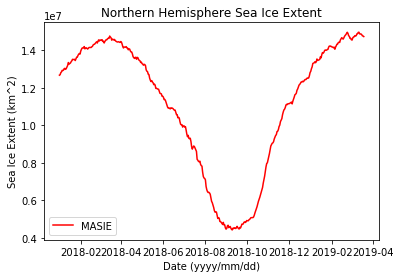

In [5]:

plt.plot(MASIE_date_range,MASIE_ice_extent,color='red',label="MASIE")
#Uncomment following to plot multiple ranges on same graph#plt.plot(date_range1,ice_extent1, label="8/1/2006 through 12/17/2007")

plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (km^2)")
plt.title("Northern Hemisphere Sea Ice Extent")
plt.legend()

#Uncomment below to save figure with unique name and file type
#plt.savefig("Figurename.filetype")


This block of code is reading in the Sea Ice Index dataset. This code is a repetition of the MASIE code with small modifications. Again, the drop function is cleaning up our dataset before we start to visualize it. In this dataset, the dat of interest is in the format yyyy-mm-dd. This is a different format than the MASIE data so be careful when entering your date range because if it is not in this format, the code will not run.

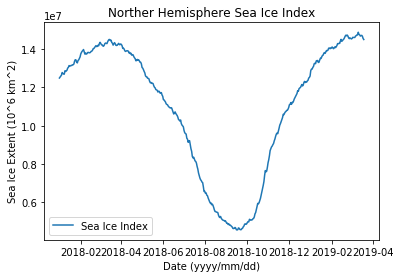

In [6]:
parse_dates=[['Year',' Month',' Day']]
seaice_df=pd.read_csv("N_seaice_extent_daily_v3.0.csv",skiprows=[1],parse_dates=parse_dates)

seaice_clean_df = seaice_df.drop(['    Missing',' Source Data'], axis=1)

def DOI_Seaice(start,end):
    seaice=seaice_clean_df.loc[(seaice_clean_df['Year_ Month_ Day'] >= start) & (seaice_clean_df['Year_ Month_ Day'] < end)]
    seaice_drop=seaice.drop(['     Extent'], axis=1)
    return seaice_drop
SI_date_range=DOI_Seaice('2018-01-01','2019-03-20')

###############################################

def sea_extent(start,end):
    extent=seaice_clean_df.loc[(seaice_clean_df['Year_ Month_ Day'] >= start) & (seaice_clean_df['Year_ Month_ Day'] < end)]
    extent_drop=extent.drop(['Year_ Month_ Day'],axis=1)
    return extent_drop
SI_ice_extent=sea_extent('2018-01-01','2019-03-20')*10E5


plt.plot(SI_date_range,SI_ice_extent, label='Sea Ice Index')

plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Norther Hemisphere Sea Ice Index")
plt.legend()

Finally we will incorporate the Near Real Time Climate Data Record for sea ice (NRT CDR). This data set has been reduced into a CSV file by a seperate code so the dates and values are already cleaned up and ready for visualization. Because we have two data sets for CDR data, we will need to import both seperately before using them. Below will allow for either data set to be used. You must change the date range of interest through out the notebook to ensure correct date ranges are being used. For example, in this line of code, we are looking in 2018 data. For the next box of code, we will look at the 2019 data.

Text(0.5,1,'Near Real Time CDR 2018')

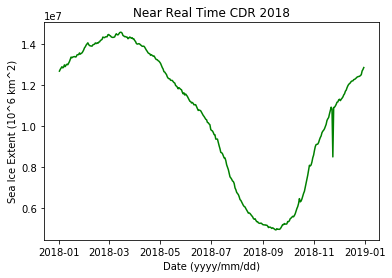

In [7]:
cdr18= pd.read_csv("index2018.csv",parse_dates=True, nrows=365)
cdr18['yyyymmdd'] = pd.to_datetime(cdr18['yyyymmdd'], infer_datetime_format=True)
#cdr18.info()
def DOI_CDR_18(start,end):
    cdr_date18=cdr18.loc[(cdr18['yyyymmdd'] >= start) & (cdr18['yyyymmdd'] <= end)]
    cdr_drop_18=cdr_date18.drop('extent', axis=1)
    return cdr_drop_18
date_cdr18=DOI_CDR_18('1/1/2018','1/1/2019') 
#
def CDR_extent_18(start,end):
    cdr_extent18=cdr18.loc[(cdr18['yyyymmdd'] >= start) & (cdr18['yyyymmdd'] <= end)]
    cdr_extent_drop18=cdr_extent18.drop(['yyyymmdd'],axis=1)
    return cdr_extent_drop18
cdr_ext18=CDR_extent_18('1/1/2018','1/11/2019')
#print(cdr18_ext)
plt.plot(date_cdr18,cdr_ext18,color='green', label='NRT CDR 2019')
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Near Real Time CDR 2018")

The following will import the 2019 CDR data set. This data set is currently being updated daily, because of that, make sure to only specify dates which you have downloaded into the csv file this code pulls from. For example, my data set is only valid until 7/25/2019, if I were to ask the code to plot up through August, there would be no data available and therefore cause an error within the code.

Text(0.5,1,'Near Real Time CDR 2019')

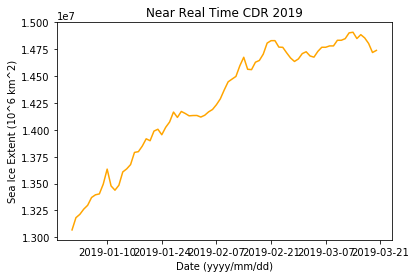

In [10]:
cdr19=pd.read_csv("index2019.csv",parse_dates=True, nrows=206)
cdr19['yyyymmdd'] = pd.to_datetime(cdr19['yyyymmdd'], infer_datetime_format=True)

#cdr19.info()

def DOI_CDR_19(start,end):
    cdr_date19=cdr19.loc[(cdr19['yyyymmdd'] >= start) & (cdr19['yyyymmdd'] <= end)]
    cdr_drop_19=cdr_date19.drop('extent', axis=1,errors='ignore')
    return cdr_drop_19
date_cdr19=DOI_CDR_19('1/1/2019','3/20/2019') 

def CDR_extent_19(start,end):
    cdr_extent19=cdr19.loc[(cdr19['yyyymmdd'] >= start) & (cdr19['yyyymmdd'] <= end)]
    cdr_extent_drop19=cdr_extent19.drop(['yyyymmdd'],axis=1)
    return cdr_extent_drop19
cdr19_ext=CDR_extent_19('1/1/2019','3/20/2019')


plt.plot(date_cdr19,cdr19_ext,color='orange', label='NRT CDR 2019')
plt.xlabel("Date (yyyy/mm/dd)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Near Real Time CDR 2019")

To plot any of these graphs together, you need to combine all code into a single box. I will add this below. When using one year vs the other, uncomment which data set you are looking at. You can comment and uncomment which ever data sets you would like to display below. Warning: When you edit a date range from an above box, make sure to run ALL boxes again to update the stored information or the graphs will not plot.

Text(0.5,1,'Sea Ice Extent Composition')

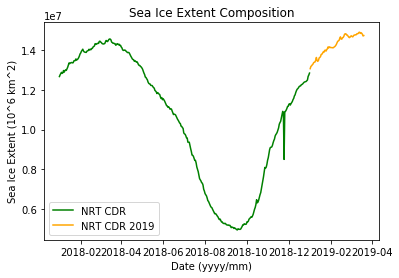

In [9]:
#Use this code to plot MASIE 
#plt.plot(MASIE_date_range,MASIE_ice_extent,color='red',label="MASIE")

#Use this code to plot Sea Ice Index
#plt.plot(SI_date_range,SI_ice_extent,color='blue', label='Sea Ice Index')

#Use this code for 2018 
plt.plot(date_cdr18,cdr_ext18,color='green',label='NRT CDR')

#use this code for 2019
plt.plot(date_cdr19,cdr19_ext,color='orange', label='NRT CDR 2019')


plt.legend()
plt.xlabel("Date (yyyy/mm)")
plt.ylabel("Sea Ice Extent (10^6 km^2)")
plt.title("Sea Ice Extent Composition")

